In [1]:
import os
import numpy as np
import time
import matplotlib.pyplot as plt
import imageio
import re

# Data Visualization

In [12]:
original_data = np.array(imageio.imread("data/train_area.tif"))
print(original_data.shape)

/tmp/ipykernel_1738/2646602177.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  original_data = np.array(imageio.imread("data/train_area.tif"))


(57832, 94303, 3)


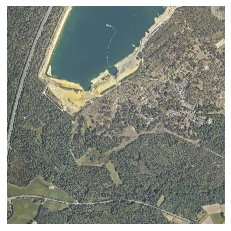

In [13]:
visible_area = original_data[:20000, 20000:40000]
plt.imshow(visible_area)
plt.axis('off')

filepath = "visualizations/thesis_graphs/train_area.pdf"
plt.savefig(filepath, bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

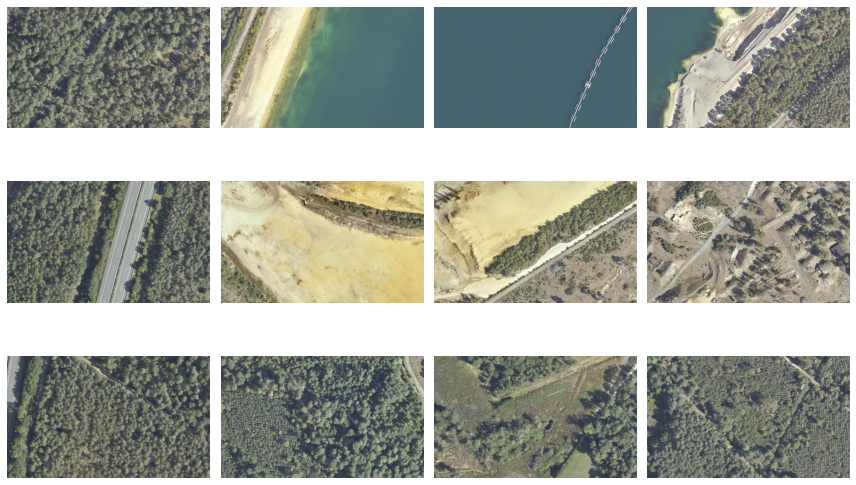

In [10]:
# Create a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(12, 8))

image_index = 0
for i in [2, 6, 11]:
    for j in [10, 12, 14, 16]:
        image = np.transpose(np.load(f"data/train_small_npy/part_{i}_{j}.npy"), (1, 2, 0))

        ax = axes[image_index // 4, image_index % 4]
        ax.imshow(image)
        ax.axis('off')

        image_index += 1

plt.tight_layout()
filepath = "visualizations/thesis_graphs/12_data_parts.pdf"
plt.savefig(filepath)
plt.show()

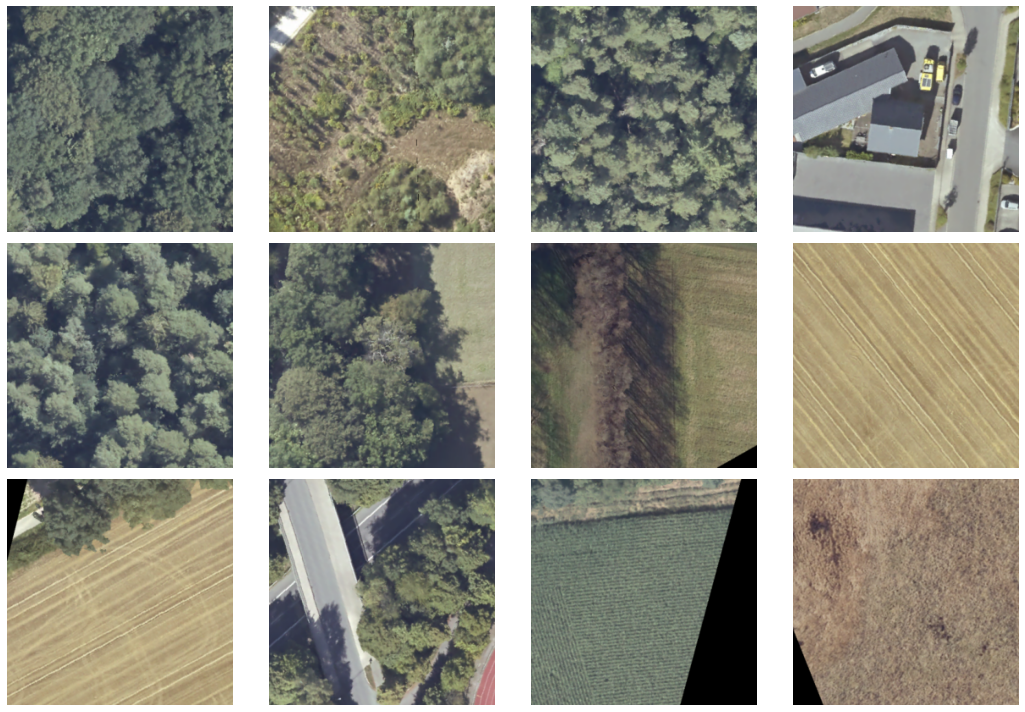

In [11]:
# Transformed parts are created in FFCV.ipynb and concatenated here
import fitz
from PIL import Image
import os
import matplotlib.pyplot as plt

# Function to convert a PDF page to an image
def pdf_to_image(pdf_path, page_number=0):
    pdf_document = fitz.open(pdf_path)
    pdf_page = pdf_document.load_page(page_number)
    pix = pdf_page.get_pixmap()
    image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    return image

# Function to concatenate images horizontally
def concatenate_images(images):
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)

    new_image = Image.new("RGB", (total_width, max_height))

    x_offset = 0
    for image in images:
        new_image.paste(image, (x_offset, 0))
        x_offset += image.width

    return new_image

folder_path = "visualizations/transform_examples"
pdf_files = [file for file in os.listdir(folder_path) if file.lower().endswith(".pdf")]

# Full paths
pdf_paths = [os.path.join(folder_path, pdf_file) for pdf_file in pdf_files]

# Load PDFs and convert each page to images
images = []
for pdf_file in pdf_paths:
    pdf_document = fitz.open(pdf_file)
    for page_number in range(pdf_document.page_count):
        page_image = pdf_to_image(pdf_file, page_number)
        images.append(page_image)

# Organize images into a 3x4 grid of subplots
num_rows = 3
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

axes = axes.flatten()

for i, image in enumerate(images):
    ax = axes[i]
    ax.imshow(image)
    ax.axis('off')

plt.tight_layout()

filepath = "visualizations/thesis_graphs/12_transformed_parts.pdf"
plt.savefig(filepath)
plt.show()

# Data Loading per Epoch

In [93]:
#PyTorch times
pytorch_output = '''
Epoch 1 done in 3.1173672676086426 seconds.
Epoch 2 done in 3.133840799331665 seconds.
Epoch 3 done in 3.0792076587677 seconds.
Epoch 4 done in 3.0485830307006836 seconds.
Epoch 5 done in 3.127227306365967 seconds.
Epoch 6 done in 3.13100528717041 seconds.
Epoch 7 done in 3.137248992919922 seconds.
Epoch 8 done in 3.1031851768493652 seconds.
Epoch 9 done in 3.2328388690948486 seconds.
Epoch 10 done in 3.093700408935547 seconds.
Epoch 11 done in 3.185558795928955 seconds.
Epoch 12 done in 3.05572509765625 seconds.
Epoch 13 done in 3.0558409690856934 seconds.
Epoch 14 done in 3.0778980255126953 seconds.
Epoch 15 done in 3.0802457332611084 seconds.
Epoch 16 done in 3.0494720935821533 seconds.
Epoch 17 done in 2.986953020095825 seconds.
Epoch 18 done in 3.132045269012451 seconds.
Epoch 19 done in 3.080597400665283 seconds.
Epoch 20 done in 3.0561399459838867 seconds.
'''

pytorch_epoch_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', pytorch_output)]
pytorch_cumulative_times = [sum(pytorch_epoch_times[:i+1]) for i in range(len(pytorch_epoch_times))]

In [94]:
#tf.data times
tfdata_output = '''
Epoch 1 done in 5.036881923675537 seconds.
Epoch 2 done in 4.366333961486816 seconds.
Epoch 3 done in 4.393307447433472 seconds.
Epoch 4 done in 4.30773138999939 seconds.
Epoch 5 done in 4.354665994644165 seconds.
Epoch 6 done in 4.264268159866333 seconds.
Epoch 7 done in 4.3263208866119385 seconds.
Epoch 8 done in 4.1328229904174805 seconds.
Epoch 9 done in 4.21198034286499 seconds.
Epoch 10 done in 4.3624444007873535 seconds.
Epoch 11 done in 4.096007585525513 seconds.
Epoch 12 done in 4.181973934173584 seconds.
Epoch 13 done in 4.496636390686035 seconds.
Epoch 14 done in 4.2517266273498535 seconds.
Epoch 15 done in 4.033868074417114 seconds.
Epoch 16 done in 4.4777374267578125 seconds.
Epoch 17 done in 4.09026575088501 seconds.
Epoch 18 done in 4.3633339405059814 seconds.
Epoch 19 done in 4.381555080413818 seconds.
Epoch 20 done in 4.520620822906494 seconds.
'''

tfdata_epoch_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', tfdata_output)]
tfdata_cumulative_times = [sum(tfdata_epoch_times[:i+1]) for i in range(len(tfdata_epoch_times))]

In [95]:
#FFCV times
ffcv_output = '''
Epoch 1 done in 6.817121982574463 seconds.
Epoch 2 done in 2.6896703243255615 seconds.
Epoch 3 done in 1.9803743362426758 seconds.
Epoch 4 done in 2.0448856353759766 seconds.
Epoch 5 done in 1.9768216609954834 seconds.
Epoch 6 done in 2.0487890243530273 seconds.
Epoch 7 done in 1.9891574382781982 seconds.
Epoch 8 done in 2.06148099899292 seconds.
Epoch 9 done in 1.9882266521453857 seconds.
Epoch 10 done in 2.045724391937256 seconds.
Epoch 11 done in 1.9814395904541016 seconds.
Epoch 12 done in 2.0444083213806152 seconds.
Epoch 13 done in 1.9823276996612549 seconds.
Epoch 14 done in 2.0433526039123535 seconds.
Epoch 15 done in 1.989295244216919 seconds.
Epoch 16 done in 2.0531883239746094 seconds.
Epoch 17 done in 1.981933832168579 seconds.
Epoch 18 done in 2.045396566390991 seconds.
Epoch 19 done in 1.9799704551696777 seconds.
Epoch 20 done in 2.0512893199920654 seconds.
'''

ffcv_epoch_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', ffcv_output)]
ffcv_cumulative_times = [sum(ffcv_epoch_times[:i+1]) for i in range(len(ffcv_epoch_times))]

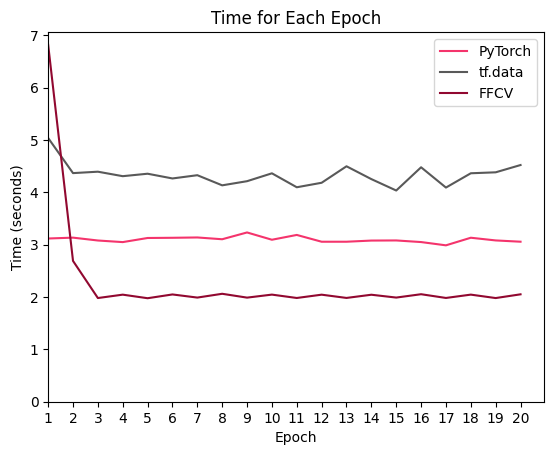

In [105]:
plt.plot(range(1, len(pytorch_epoch_times) + 1), pytorch_epoch_times, linestyle="-", color='#f4346c', label="PyTorch")
plt.plot(range(1, len(tfdata_epoch_times) + 1), tfdata_epoch_times, linestyle="-", color="#595959", label="tf.data")
plt.plot(range(1, len(ffcv_epoch_times) + 1), ffcv_epoch_times, linestyle="-", color="#910830", label="FFCV")

plt.xlabel("Epoch")
plt.ylabel("Time (seconds)")
plt.ylim(0)
plt.xlim(1)
plt.title("Time for Each Epoch")
plt.legend()
filepath = "visualizations/epoch_times.png"
plt.xticks(range(1, len(pytorch_epoch_times)+1, 1))
plt.savefig(filepath, bbox_inches='tight', pad_inches=0.2)
plt.show()

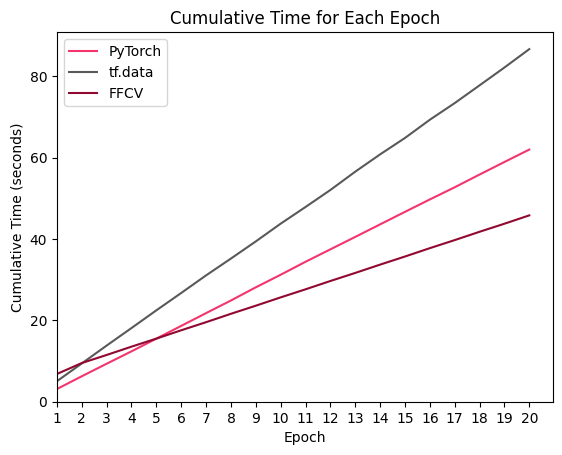

In [106]:
plt.plot(range(1, len(pytorch_cumulative_times) + 1), pytorch_cumulative_times, linestyle="-", color="#f4346c", label="PyTorch")
plt.plot(range(1, len(tfdata_cumulative_times) + 1), tfdata_cumulative_times, linestyle="-", color="#595959", label="tf.data")
plt.plot(range(1, len(ffcv_cumulative_times) + 1), ffcv_cumulative_times, linestyle="-", color="#910830", label="FFCV")

plt.xlabel("Epoch")
plt.ylabel("Cumulative Time (seconds)")
plt.ylim(0)
plt.xlim(1)
plt.title("Cumulative Time for Each Epoch")
plt.legend()
plt.xticks(range(1, len(pytorch_epoch_times)+1, 1))
filepath = "visualizations/cum_epoch_times.png"
plt.savefig(filepath, bbox_inches='tight', pad_inches=0.2)
plt.show()

# 3-Stage Graph CPU

## Average time calculations

In [46]:
#Loading
pytorch_output = '''
Epoch 1 done in 22.76828694343567 seconds.
Epoch 2 done in 3.410783290863037 seconds.
Epoch 3 done in 3.134819746017456 seconds.
Epoch 4 done in 2.994314432144165 seconds.
Epoch 5 done in 2.9443817138671875 seconds.
Epoch 6 done in 3.0001449584960938 seconds.
Epoch 7 done in 2.9980835914611816 seconds.
Epoch 8 done in 3.0589168071746826 seconds.
Epoch 9 done in 2.9907238483428955 seconds.
Epoch 10 done in 3.0127363204956055 seconds.
Epoch 11 done in 2.9884285926818848 seconds.
Epoch 12 done in 2.98771333694458 seconds.
Epoch 13 done in 3.083491802215576 seconds.
Epoch 14 done in 3.0923750400543213 seconds.
Epoch 15 done in 2.9602842330932617 seconds.
Epoch 16 done in 2.970792770385742 seconds.
Epoch 17 done in 2.9881350994110107 seconds.
Epoch 18 done in 2.9133822917938232 seconds.
Epoch 19 done in 2.971561908721924 seconds.
Epoch 20 done in 2.8955419063568115 seconds.
'''

pytorch_loading_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', pytorch_output)]
pytorch_loading = sum(pytorch_loading_times) / len(pytorch_loading_times)

In [47]:
#Loading
tfdata_output = '''
Epoch 1 done in 8.77206802368164 seconds.
Epoch 2 done in 4.1725664138793945 seconds.
Epoch 3 done in 3.9357666969299316 seconds.
Epoch 4 done in 3.998960256576538 seconds.
Epoch 5 done in 4.20180082321167 seconds.
Epoch 6 done in 4.013922214508057 seconds.
Epoch 7 done in 5.115509510040283 seconds.
Epoch 8 done in 4.032156944274902 seconds.
Epoch 9 done in 3.8708066940307617 seconds.
Epoch 10 done in 3.759718656539917 seconds.
Epoch 11 done in 3.9548237323760986 seconds.
Epoch 12 done in 3.9406940937042236 seconds.
Epoch 13 done in 3.8460168838500977 seconds.
Epoch 14 done in 3.828158378601074 seconds.
Epoch 15 done in 3.7076408863067627 seconds.
Epoch 16 done in 3.880258083343506 seconds.
Epoch 17 done in 3.788156747817993 seconds.
Epoch 18 done in 3.914205312728882 seconds.
Epoch 19 done in 4.007144451141357 seconds.
Epoch 20 done in 3.9359707832336426 seconds.
'''

tfdata_loading_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', tfdata_output)]
tfdata_loading = sum(tfdata_loading_times) / len(tfdata_loading_times)

In [48]:
#Loading
ffcv_output = '''
Epoch 1 done in 131.69680547714233 seconds.
Epoch 2 done in 2.1754491329193115 seconds.
Epoch 3 done in 2.176996946334839 seconds.
Epoch 4 done in 2.1716232299804688 seconds.
Epoch 5 done in 2.172194480895996 seconds.
Epoch 6 done in 2.1658804416656494 seconds.
Epoch 7 done in 2.1815292835235596 seconds.
Epoch 8 done in 2.176659345626831 seconds.
Epoch 9 done in 2.174011707305908 seconds.
Epoch 10 done in 2.165081262588501 seconds.
Epoch 11 done in 2.1699020862579346 seconds.
Epoch 12 done in 2.122988224029541 seconds.
Epoch 13 done in 2.171973466873169 seconds.
Epoch 14 done in 2.1224732398986816 seconds.
Epoch 15 done in 2.163543939590454 seconds.
Epoch 16 done in 2.1234636306762695 seconds.
Epoch 17 done in 2.128175973892212 seconds.
Epoch 18 done in 2.12034010887146 seconds.
Epoch 19 done in 2.117750644683838 seconds.
Epoch 20 done in 2.155998945236206 seconds.
'''

ffcv_loading_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', ffcv_output)]
ffcv_loading = sum(ffcv_loading_times) / len(ffcv_loading_times)

In [49]:
#Preprocess
pytorch_output = '''
Epoch 1 done in 285.60568165779114 seconds.
Epoch 2 done in 251.79779887199402 seconds.
Epoch 3 done in 242.05861067771912 seconds.
Epoch 4 done in 260.11944103240967 seconds.
Epoch 5 done in 243.05597758293152 seconds.
Epoch 6 done in 234.65044236183167 seconds.
Epoch 7 done in 250.83137035369873 seconds.
Epoch 8 done in 245.9380533695221 seconds.
Epoch 9 done in 247.9998722076416 seconds.
Epoch 10 done in 246.38864469528198 seconds.
'''

pytorch_preprocess_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', pytorch_output)]
pytorch_preprocess = sum(pytorch_preprocess_times) / len(pytorch_preprocess_times)

In [50]:
#Preprocess
tfdata_output = '''
Epoch 1 done in 323.1505460739136 seconds.
Epoch 2 done in 318.28870964050293 seconds.
Epoch 3 done in 327.91578364372253 seconds.
Epoch 4 done in 318.7570502758026 seconds.
Epoch 5 done in 308.46475768089294 seconds.
Epoch 6 done in 320.7336037158966 seconds.
Epoch 7 done in 302.6726689338684 seconds.
Epoch 8 done in 298.4840362071991 seconds.
Epoch 9 done in 307.5554802417755 seconds.
Epoch 10 done in 295.64889574050903 seconds.
'''

tfdata_preprocess_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', tfdata_output)]
tfdata_preprocess = sum(tfdata_preprocess_times) / len(tfdata_preprocess_times)

In [51]:
#Preprocess
ffcv_output = '''
Epoch 1 done in 153.1041705608368 seconds.
Epoch 2 done in 146.23926663398743 seconds.
Epoch 3 done in 154.82725048065186 seconds.
Epoch 4 done in 157.18064951896667 seconds.
Epoch 5 done in 151.49009561538696 seconds.
Epoch 6 done in 159.79161310195923 seconds.
Epoch 7 done in 178.50044131278992 seconds.
Epoch 8 done in 139.15274596214294 seconds.
Epoch 9 done in 123.39749646186829 seconds.
Epoch 10 done in 127.07772946357727 seconds.
'''

ffcv_preprocess_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', ffcv_output)]
ffcv_preprocess = sum(ffcv_preprocess_times) / len(ffcv_preprocess_times)

In [52]:
#Model
pytorch_output = '''
Epoch 1 done in 456.24435091018677 seconds.
Epoch 2 done in 368.70431685447693 seconds.
Epoch 3 done in 382.88734769821167 seconds.
Epoch 4 done in 380.9022660255432 seconds.
Epoch 5 done in 386.09743213653564 seconds.
Epoch 6 done in 385.7481861114502 seconds.
Epoch 7 done in 373.4353709220886 seconds.
Epoch 8 done in 390.1825249195099 seconds.
Epoch 9 done in 384.55529618263245 seconds.
Epoch 10 done in 354.8102881908417 seconds.
'''

pytorch_model_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', pytorch_output)]
pytorch_model = sum(pytorch_model_times) / len(pytorch_model_times)

In [53]:
#Model
tfdata_output = '''
Epoch 1 done in 469.6996729373932 seconds.
Epoch 2 done in 455.69856905937195 seconds.
Epoch 3 done in 455.5163300037384 seconds.
Epoch 4 done in 484.2993869781494 seconds.
Epoch 5 done in 462.66717076301575 seconds.
Epoch 6 done in 572.1970403194427 seconds.
Epoch 7 done in 501.33690428733826 seconds.
Epoch 8 done in 507.70059871673584 seconds.
Epoch 9 done in 509.2733688354492 seconds.
Epoch 10 done in 524.6082739830017 seconds.
'''

tfdata_model_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', tfdata_output)]
tfdata_model = sum(tfdata_model_times) / len(tfdata_model_times)

In [54]:
#Model
ffcv_output = '''
Epoch 1 done in 257.0513689517975 seconds.
Epoch 2 done in 344.6536297798157 seconds.
Epoch 3 done in 280.31611824035645 seconds.
Epoch 4 done in 224.05312156677246 seconds.
Epoch 5 done in 276.9830713272095 seconds.
Epoch 6 done in 216.7069058418274 seconds.
Epoch 7 done in 229.70199275016785 seconds.
Epoch 8 done in 223.4653160572052 seconds.
Epoch 9 done in 237.73408246040344 seconds.
Epoch 10 done in 244.39098501205444 seconds.
'''

ffcv_model_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', ffcv_output)]
ffcv_model = sum(ffcv_model_times) / len(ffcv_model_times)

In [55]:
pytorch_times = [pytorch_loading, pytorch_preprocess, pytorch_model]
tfdata_times = [tfdata_loading, tfdata_preprocess, tfdata_model]
ffcv_times = [ffcv_loading, ffcv_preprocess, ffcv_model]
data = [pytorch_times, tfdata_times, ffcv_times]
print(data)

[[4.0082449316978455, 250.84458928108216, 386.3567379951477], [4.233817279338837, 312.16715321540835, 494.29973158836367], [8.632642078399659, 149.07614591121674, 253.50565919876098]]


## Graphs

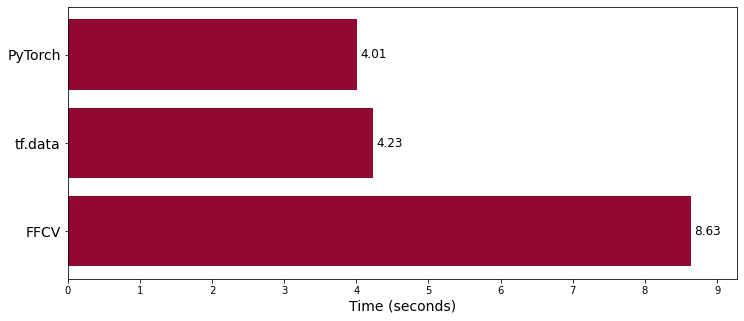

In [56]:
#Data Loading stage
color_codes = ["#910830"]

plt.figure(figsize=(12, 5))

bar_height = 0.2
bar_positions = [0, 0.25, 0.5]

for stage in [0]: #Plot the last stage first and overlap graph
    for i in range(3): #For each method
        plt.barh(bar_positions[2-i], data[i][stage],
                 height=bar_height, color=color_codes[stage])
        if stage == 0:
            plt.text(data[i][stage] + 0.05, bar_positions[2-i], f"{data[i][stage]:.2f}", va='center', fontsize=12)
plt.xlabel("Time (seconds)", fontsize=14)

methods = ["FFCV", "tf.data", "PyTorch"]
plt.yticks(bar_positions, methods, fontsize=14)
max_x = max(max(list) for list in [lst[:1] for lst in data])
plt.xlim(0, 1.075 * max_x)
plt.xticks(np.arange(0, 1.075 * max_x, 1))
filepath = "visualizations/data_loading.png"
#plt.savefig(filepath, bbox_inches='tight', pad_inches=0.2)
plt.show()

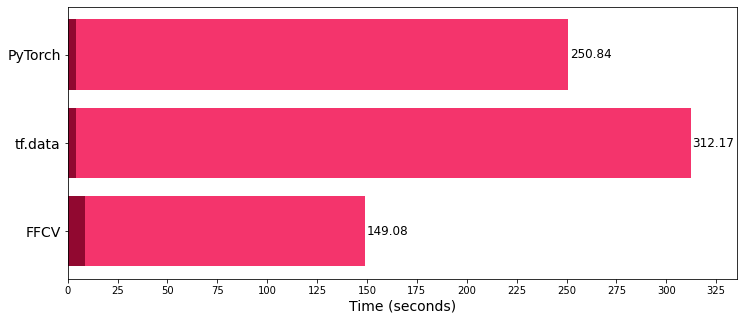

In [57]:
#Data Processing stage
color_codes = ["#910830", "#f4346c"]

plt.figure(figsize=(12, 5))

bar_height = 0.2
bar_positions = [0, 0.25, 0.5]

for stage in [1, 0]: #Plot the last stage first and overlap graph
    for i in range(3): #For each method
        plt.barh(bar_positions[2-i], data[i][stage],
                 height=bar_height, color=color_codes[stage])
        if stage == 1:
            plt.text(data[i][stage] + 1, bar_positions[2-i], f"{data[i][stage]:.2f}", va='center', fontsize=12)

plt.xlabel("Time (seconds)", fontsize=14)

methods = ["FFCV", "tf.data", "PyTorch"]
plt.yticks(bar_positions, methods, fontsize=14)
max_x = max(max(list) for list in [lst[:2] for lst in data])
plt.xlim(0, 1.075 * max_x)
plt.xticks(np.arange(0, 1.075 * max_x, 25))
filepath = "visualizations/preprocessing.png"
#plt.savefig(filepath, bbox_inches='tight', pad_inches=0.2)
plt.show()

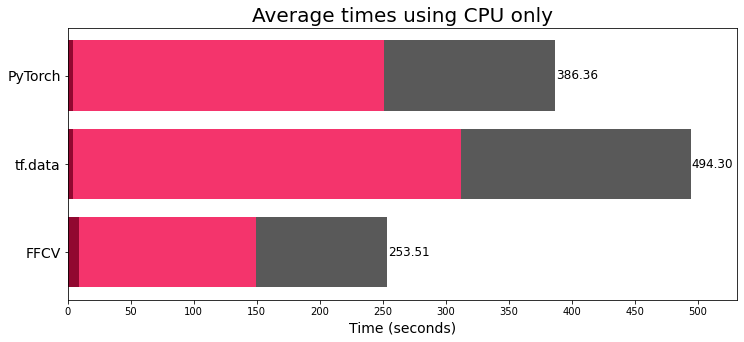

In [58]:
#All three stages
color_codes = ["#910830", "#f4346c", "#595959"]

plt.figure(figsize=(12, 5))

bar_height = 0.2
bar_positions = [0, 0.25, 0.5]

for stage in [2, 1, 0]:
    for i in range(3):
        plt.barh(bar_positions[2-i], data[i][stage],
                 height=bar_height, color=color_codes[stage])

        if stage == 2:
            plt.text(data[i][stage] + 1, bar_positions[2-i], f"{data[i][stage]:.2f}", va='center', fontsize=12)

plt.xlabel("Time (seconds)", fontsize=14)

methods = ["FFCV", "tf.data", "PyTorch"]
plt.yticks(bar_positions, methods, fontsize=14)
plt.xticks(np.arange(0, 1.075 * max(max(lst) for lst in data), 50))
plt.xlim(0, 1.075 * max(max(lst) for lst in data))
plt.title("Average times using CPU only", fontsize=20)
filepath = "visualizations/thesis_graphs/CPU_avg.pdf"
plt.savefig(filepath)#, bbox_inches='tight', pad_inches=0.2)
plt.show()

# 3-Stage Graph GPU

## Time Outputs

In [30]:
#Preprocess
pytorch_output = '''
Epoch 1 done in 29.38820505142212 seconds.
Epoch 2 done in 8.953882932662964 seconds.
Epoch 3 done in 8.759075403213501 seconds.
Epoch 4 done in 8.57324481010437 seconds.
Epoch 5 done in 8.56590747833252 seconds.
Epoch 6 done in 8.47000765800476 seconds.
Epoch 7 done in 8.431491374969482 seconds.
Epoch 8 done in 8.50905990600586 seconds.
Epoch 9 done in 8.609120845794678 seconds.
Epoch 10 done in 8.466728448867798 seconds.
'''

pytorch_preprocess_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', pytorch_output)]
pytorch_preprocess = sum(pytorch_preprocess_times) / len(pytorch_preprocess_times)

In [32]:
#Preprocess
ffcv_output = '''
Epoch 1 done in 16.555816173553467 seconds.
Epoch 2 done in 12.278502941131592 seconds.
Epoch 3 done in 13.030890226364136 seconds.
Epoch 4 done in 12.333853244781494 seconds.
Epoch 5 done in 12.347510814666748 seconds.
Epoch 6 done in 12.660207271575928 seconds.
Epoch 7 done in 13.23523211479187 seconds.
Epoch 8 done in 12.569372653961182 seconds.
Epoch 9 done in 13.26018476486206 seconds.
Epoch 10 done in 12.18492341041565 seconds.
'''

ffcv_preprocess_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', ffcv_output)]
ffcv_preprocess = sum(ffcv_preprocess_times) / len(ffcv_preprocess_times)

In [33]:
#Model
pytorch_output = '''
Epoch 1 done in 29.538519620895386 seconds.
Epoch 2 done in 10.11624526977539 seconds.
Epoch 3 done in 10.337998867034912 seconds.
Epoch 4 done in 10.112791538238525 seconds.
Epoch 5 done in 10.186606884002686 seconds.
Epoch 6 done in 10.156364679336548 seconds.
Epoch 7 done in 10.214253425598145 seconds.
Epoch 8 done in 10.150419473648071 seconds.
Epoch 9 done in 10.034946203231812 seconds.
Epoch 10 done in 10.226240396499634 seconds.
'''

pytorch_model_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', pytorch_output)]
pytorch_model = sum(pytorch_model_times) / len(pytorch_model_times)

In [35]:
#Model
ffcv_output = '''
Epoch 1 done in 20.68252992630005 seconds.
Epoch 2 done in 15.581626653671265 seconds.
Epoch 3 done in 14.77998161315918 seconds.
Epoch 4 done in 15.00122618675232 seconds.
Epoch 5 done in 15.144744634628296 seconds.
Epoch 6 done in 15.31307339668274 seconds.
Epoch 7 done in 15.636549949645996 seconds.
Epoch 8 done in 15.72204041481018 seconds.
Epoch 9 done in 15.008957147598267 seconds.
Epoch 10 done in 15.26915693283081 seconds.
'''

ffcv_model_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', ffcv_output)]
ffcv_model = sum(ffcv_model_times) / len(ffcv_model_times)

## Full Graph Generation

## 2 Graphs Generation

In [38]:
# Loading times from CPU output
pytorch_times = [pytorch_loading, pytorch_preprocess, pytorch_model]
ffcv_times = [ffcv_loading, ffcv_preprocess, ffcv_model]
data = [pytorch_times, ffcv_times]
print(data)

[[4.0082449316978455, 10.672672390937805, 12.10743863582611], [8.632642078399659, 13.045649361610412, 15.81398868560791]]


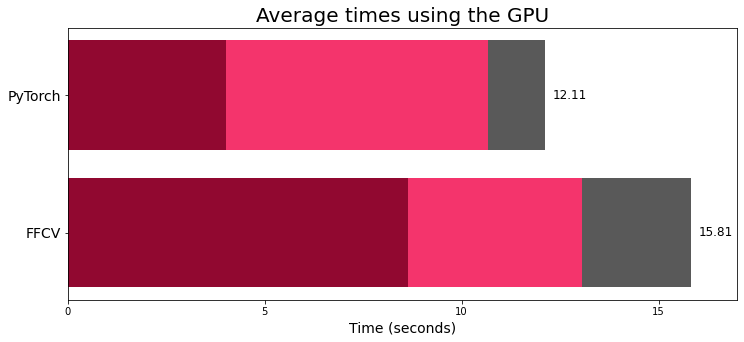

In [44]:
color_codes = ["#910830", "#f4346c", "#595959"]

plt.figure(figsize=(12, 5))

bar_height = 0.2
bar_positions = [0.25, 0.5]

for stage in [2, 1, 0]:
    for i in range(2):
        plt.barh(bar_positions[1-i], data[i][stage],
                 height=bar_height, color=color_codes[stage])

        if stage == 2:
            plt.text(data[i][stage] + 0.2, bar_positions[1-i], f"{data[i][stage]:.2f}", va='center', fontsize=12)

plt.xlabel("Time (seconds)", fontsize=14)

methods = ["FFCV", "PyTorch"]
plt.yticks(bar_positions, methods, fontsize=14)
plt.xticks(np.arange(0, 1.075 * max(max(lst) for lst in data), 5))
plt.xlim(0, 1.075 * max(max(lst) for lst in data))
plt.title("Average times using the GPU", fontsize=20)
filepath = "visualizations/thesis_graphs/2_GPU_avg.pdf"
plt.savefig(filepath)
plt.show()

# Storage System Loading - SSD vs CephFS

## Time Outputs

In [14]:
#PyTorch times CephFS
pytorch_CFS_output = '''
Epoch 1 done in 22.76828694343567 seconds.
Epoch 2 done in 3.410783290863037 seconds.
Epoch 3 done in 3.134819746017456 seconds.
Epoch 4 done in 2.994314432144165 seconds.
Epoch 5 done in 2.9443817138671875 seconds.
Epoch 6 done in 3.0001449584960938 seconds.
Epoch 7 done in 2.9980835914611816 seconds.
Epoch 8 done in 3.0589168071746826 seconds.
Epoch 9 done in 2.9907238483428955 seconds.
Epoch 10 done in 3.0127363204956055 seconds.
Epoch 11 done in 2.9884285926818848 seconds.
Epoch 12 done in 2.98771333694458 seconds.
Epoch 13 done in 3.083491802215576 seconds.
Epoch 14 done in 3.0923750400543213 seconds.
Epoch 15 done in 2.9602842330932617 seconds.
Epoch 16 done in 2.970792770385742 seconds.
Epoch 17 done in 2.9881350994110107 seconds.
Epoch 18 done in 2.9133822917938232 seconds.
Epoch 19 done in 2.971561908721924 seconds.
Epoch 20 done in 2.8955419063568115 seconds.
'''

pytorch_CFS_epoch_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', pytorch_CFS_output)]

In [15]:
#tf.data times CephFS
tfdata_CFS_output = '''
Epoch 1 done in 8.77206802368164 seconds.
Epoch 2 done in 4.1725664138793945 seconds.
Epoch 3 done in 3.9357666969299316 seconds.
Epoch 4 done in 3.998960256576538 seconds.
Epoch 5 done in 4.20180082321167 seconds.
Epoch 6 done in 4.013922214508057 seconds.
Epoch 7 done in 5.115509510040283 seconds.
Epoch 8 done in 4.032156944274902 seconds.
Epoch 9 done in 3.8708066940307617 seconds.
Epoch 10 done in 3.759718656539917 seconds.
Epoch 11 done in 3.9548237323760986 seconds.
Epoch 12 done in 3.9406940937042236 seconds.
Epoch 13 done in 3.8460168838500977 seconds.
Epoch 14 done in 3.828158378601074 seconds.
Epoch 15 done in 3.7076408863067627 seconds.
Epoch 16 done in 3.880258083343506 seconds.
Epoch 17 done in 3.788156747817993 seconds.
Epoch 18 done in 3.914205312728882 seconds.
Epoch 19 done in 4.007144451141357 seconds.
Epoch 20 done in 3.9359707832336426 seconds.
'''

tfdata_CFS_epoch_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', tfdata_CFS_output)]

In [16]:
#FFCV times CephFS
ffcv_CFS_output = '''
Epoch 1 done in 131.69680547714233 seconds.
Epoch 2 done in 2.1754491329193115 seconds.
Epoch 3 done in 2.176996946334839 seconds.
Epoch 4 done in 2.1716232299804688 seconds.
Epoch 5 done in 2.172194480895996 seconds.
Epoch 6 done in 2.1658804416656494 seconds.
Epoch 7 done in 2.1815292835235596 seconds.
Epoch 8 done in 2.176659345626831 seconds.
Epoch 9 done in 2.174011707305908 seconds.
Epoch 10 done in 2.165081262588501 seconds.
Epoch 11 done in 2.1699020862579346 seconds.
Epoch 12 done in 2.122988224029541 seconds.
Epoch 13 done in 2.171973466873169 seconds.
Epoch 14 done in 2.1224732398986816 seconds.
Epoch 15 done in 2.163543939590454 seconds.
Epoch 16 done in 2.1234636306762695 seconds.
Epoch 17 done in 2.128175973892212 seconds.
Epoch 18 done in 2.12034010887146 seconds.
Epoch 19 done in 2.117750644683838 seconds.
Epoch 20 done in 2.155998945236206 seconds.
'''

ffcv_CFS_epoch_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', ffcv_CFS_output)]

In [17]:
#Pytorch times SSD
pytorch_SSD_output = '''
Epoch 1 done in 10.535576820373535 seconds.
Epoch 2 done in 3.601100444793701 seconds.
Epoch 3 done in 2.8007662296295166 seconds.
Epoch 4 done in 2.839632749557495 seconds.
Epoch 5 done in 2.670599937438965 seconds.
Epoch 6 done in 2.767557382583618 seconds.
Epoch 7 done in 2.7281041145324707 seconds.
Epoch 8 done in 2.665832042694092 seconds.
Epoch 9 done in 2.6919002532958984 seconds.
Epoch 10 done in 2.667180299758911 seconds.
Epoch 11 done in 2.7216289043426514 seconds.
Epoch 12 done in 2.853832244873047 seconds.
Epoch 13 done in 2.766788959503174 seconds.
Epoch 14 done in 2.6766817569732666 seconds.
Epoch 15 done in 2.7184154987335205 seconds.
Epoch 16 done in 2.600506067276001 seconds.
Epoch 17 done in 2.7290151119232178 seconds.
Epoch 18 done in 2.7595887184143066 seconds.
Epoch 19 done in 2.692464590072632 seconds.
Epoch 20 done in 2.783524513244629 seconds.
'''

pytorch_SSD_epoch_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', pytorch_SSD_output)]

In [18]:
#tf.data times SSD
tfdata_SSD_output = '''
Epoch 1 done in 8.745347261428833 seconds.
Epoch 2 done in 3.750429630279541 seconds.
Epoch 3 done in 3.879117250442505 seconds.
Epoch 4 done in 3.8402698040008545 seconds.
Epoch 5 done in 3.7297167778015137 seconds.
Epoch 6 done in 3.8021466732025146 seconds.
Epoch 7 done in 3.8750362396240234 seconds.
Epoch 8 done in 4.030210018157959 seconds.
Epoch 9 done in 3.7089996337890625 seconds.
Epoch 10 done in 3.6857492923736572 seconds.
Epoch 11 done in 3.786292791366577 seconds.
Epoch 12 done in 3.77272367477417 seconds.
Epoch 13 done in 3.7970094680786133 seconds.
Epoch 14 done in 3.825350284576416 seconds.
Epoch 15 done in 3.8579699993133545 seconds.
Epoch 16 done in 3.714339256286621 seconds.
Epoch 17 done in 3.9939968585968018 seconds.
Epoch 18 done in 4.0434181690216064 seconds.
Epoch 19 done in 3.9814507961273193 seconds.
Epoch 20 done in 3.7991955280303955 seconds.
'''

tfdata_SSD_epoch_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', tfdata_SSD_output)]

In [19]:
#FFCV times SSD
ffcv_SSD_output = '''
Epoch 1 done in 15.522669553756714 seconds.
Epoch 2 done in 2.5188796520233154 seconds.
Epoch 3 done in 1.9690139293670654 seconds.
Epoch 4 done in 1.9043705463409424 seconds.
Epoch 5 done in 1.8938262462615967 seconds.
Epoch 6 done in 1.891934871673584 seconds.
Epoch 7 done in 1.895000696182251 seconds.
Epoch 8 done in 1.8918406963348389 seconds.
Epoch 9 done in 1.8953001499176025 seconds.
Epoch 10 done in 1.890974998474121 seconds.
Epoch 11 done in 1.8937747478485107 seconds.
Epoch 12 done in 1.8998191356658936 seconds.
Epoch 13 done in 1.9049036502838135 seconds.
Epoch 14 done in 1.9015371799468994 seconds.
Epoch 15 done in 1.9000346660614014 seconds.
Epoch 16 done in 1.9002392292022705 seconds.
Epoch 17 done in 1.8937146663665771 seconds.
Epoch 18 done in 1.8943438529968262 seconds.
Epoch 19 done in 1.8933472633361816 seconds.
Epoch 20 done in 1.920060396194458 seconds.
'''

ffcv_SSD_epoch_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', ffcv_SSD_output)]

## Graph Generation

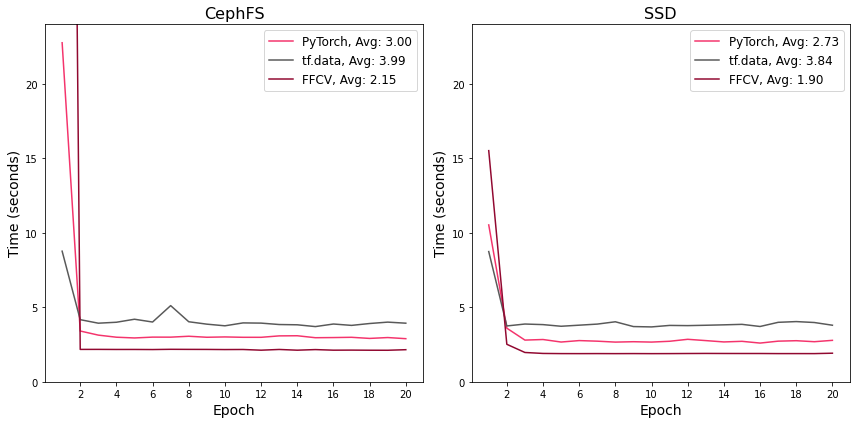

In [52]:
# Create subplots with 1 row and 2 columns, sharing the y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(12, 6))

pytorch_CFS_label = f"PyTorch, Avg: {sum(pytorch_CFS_epoch_times[2:]) / 18:.2f}"
tfdata_CFS_label = f"tf.data, Avg: {sum(tfdata_CFS_epoch_times[2:])/18:.2f}"
ffcv_CFS_label = f"FFCV, Avg: {sum(ffcv_CFS_epoch_times[2:])/18:.2f}"
pytorch_SSD_label = f"PyTorch, Avg: {sum(pytorch_SSD_epoch_times[2:])/18:.2f}"
tfdata_SSD_label = f"tf.data, Avg: {sum(tfdata_SSD_epoch_times[2:])/18:.2f}"
ffcv_SSD_label = f"FFCV, Avg: {sum(ffcv_SSD_epoch_times[2:])/18:.2f}"

# Plot the first graph on the left subplot
ax1.plot(range(1, len(pytorch_CFS_epoch_times) + 1), pytorch_CFS_epoch_times, linestyle="-", color='#f4346c', label=pytorch_CFS_label)
ax1.plot(range(1, len(tfdata_CFS_epoch_times) + 1), tfdata_CFS_epoch_times, linestyle="-", color="#595959", label=tfdata_CFS_label)
ax1.plot(range(1, len(ffcv_CFS_epoch_times) + 1), ffcv_CFS_epoch_times, linestyle="-", color="#910830", label=ffcv_CFS_label)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Time (seconds)", fontsize=14)
ax1.set_title("CephFS", fontsize=16)
ax1.legend(fontsize=12)
ax1.set_ylim(0, 24)
ax1.set_xticks(range(2, len(pytorch_CFS_epoch_times) + 1, 2))

# Plot the second graph on the right subplot
ax2.plot(range(1, len(pytorch_SSD_epoch_times) + 1), pytorch_SSD_epoch_times, linestyle="-", color='#f4346c', label=pytorch_SSD_label)
ax2.plot(range(1, len(tfdata_SSD_epoch_times) + 1), tfdata_SSD_epoch_times, linestyle="-", color="#595959", label=tfdata_SSD_label)
ax2.plot(range(1, len(ffcv_SSD_epoch_times) + 1), ffcv_SSD_epoch_times, linestyle="-", color="#910830", label=ffcv_SSD_label)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Time (seconds)", fontsize=14)
ax2.set_title("SSD", fontsize=16)
ax2.legend(fontsize=12)
ax2.set_ylim(0, 24)
ax2.set_xticks(range(2, len(pytorch_CFS_epoch_times) + 1, 2))

filepath = "visualizations/thesis_graphs/storage_times.pdf"
plt.tight_layout()
plt.savefig(filepath)
plt.show()

# 200GB Loading

Training times for PyTorch, Random und Quasi

## Time Outputs

In [2]:
#PyTorch times
pytorch_output = '''
Epoch 1 done in 519.0264642238617 seconds.
Epoch 2 done in 527.9110577106476 seconds.
Epoch 3 done in 564.508202791214 seconds.
Epoch 4 done in 504.62781500816345 seconds.
Epoch 5 done in 535.0007140636444 seconds.
Epoch 6 done in 585.1651082038879 seconds.
Epoch 7 done in 531.1468064785004 seconds.
Epoch 8 done in 642.8812713623047 seconds.
Epoch 9 done in 563.2509710788727 seconds.
Epoch 10 done in 572.5111229419708 seconds.
Epoch 11 done in 641.9526226520538 seconds.
Epoch 12 done in 557.3534407615662 seconds.
Epoch 13 done in 614.1739091873169 seconds.
Epoch 14 done in 612.5322651863098 seconds.
Epoch 15 done in 556.8544085025787 seconds.
Epoch 16 done in 591.4019739627838 seconds.
Epoch 17 done in 529.8777468204498 seconds.
Epoch 18 done in 545.0977780818939 seconds.
Epoch 19 done in 531.2759389877319 seconds.
Epoch 20 done in 593.2343735694885 seconds.
'''

pytorch_epoch_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', pytorch_output)]
pytorch_average = sum(pytorch_epoch_times) / len(pytorch_epoch_times)

In [3]:
#ffcv random times
ffcv_random_output = '''
Epoch 1 done in 319.7451355457306 seconds.
Epoch 2 done in 316.8419246673584 seconds.
Epoch 3 done in 322.68385124206543 seconds.
Epoch 4 done in 317.2130675315857 seconds.
Epoch 5 done in 410.2791516780853 seconds.
Epoch 6 done in 457.6767113208771 seconds.
Epoch 7 done in 309.9457941055298 seconds.
Epoch 8 done in 330.6124532222748 seconds.
Epoch 9 done in 295.680513381958 seconds.
Epoch 10 done in 267.34116291999817 seconds.
Epoch 11 done in 269.8850929737091 seconds.
Epoch 12 done in 256.6614365577698 seconds.
Epoch 13 done in 258.51484274864197 seconds.
Epoch 14 done in 272.53777742385864 seconds.
Epoch 15 done in 258.6794934272766 seconds.
Epoch 16 done in 344.9382908344269 seconds.
Epoch 17 done in 356.1587224006653 seconds.
Epoch 18 done in 306.158789396286 seconds.
Epoch 19 done in 277.46686005592346 seconds.
Epoch 20 done in 261.1634705066681 seconds.
'''

ffcv_random_epoch_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', ffcv_random_output)]
ffcv_random_average = sum(ffcv_random_epoch_times) / len(ffcv_random_epoch_times)

In [4]:
#ffcv quasi-random times
ffcv_quasi_output = '''
Epoch 1 done in 216.24499583244324 seconds.
Epoch 2 done in 254.46491527557373 seconds.
Epoch 3 done in 213.68272852897644 seconds.
Epoch 4 done in 237.83393168449402 seconds.
Epoch 5 done in 210.96319961547852 seconds.
Epoch 6 done in 201.88674592971802 seconds.
Epoch 7 done in 286.4637885093689 seconds.
Epoch 8 done in 207.86131072044373 seconds.
Epoch 9 done in 207.576354265213 seconds.
Epoch 10 done in 217.668354511261 seconds.
Epoch 11 done in 207.368066072464 seconds.
Epoch 12 done in 247.97282314300537 seconds.
Epoch 13 done in 208.24596452713013 seconds.
Epoch 14 done in 225.62724137306213 seconds.
Epoch 15 done in 209.60393023490906 seconds.
Epoch 16 done in 320.1220238208771 seconds.
Epoch 17 done in 240.5073926448822 seconds.
Epoch 18 done in 216.04406905174255 seconds.
Epoch 19 done in 271.2136731147766 seconds.
Epoch 20 done in 209.07330799102783 seconds.
'''

ffcv_quasi_epoch_times = [float(match.group(1)) for match in re.finditer(r'Epoch \d+ done in (\d+\.\d+) seconds', ffcv_quasi_output)]
ffcv_quasi_average = sum(ffcv_quasi_epoch_times) / len(ffcv_quasi_epoch_times)

## Graph Generation

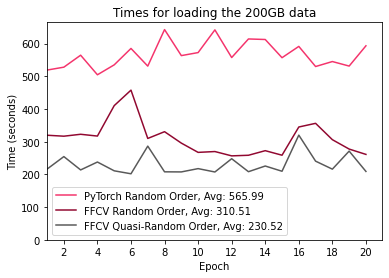

In [5]:
pytorch_label = f"PyTorch Random Order, Avg: {pytorch_average:.2f}"
ffcv_random_label = f"FFCV Random Order, Avg: {ffcv_random_average:.2f}"
ffcv_quasi_label = f"FFCV Quasi-Random Order, Avg: {ffcv_quasi_average:.2f}"

plt.plot(range(1, len(pytorch_epoch_times) + 1), pytorch_epoch_times, linestyle="-", color='#f4346c', label=pytorch_label)
plt.plot(range(1, len(ffcv_random_epoch_times) + 1), ffcv_random_epoch_times, linestyle="-", color="#910830", label=ffcv_random_label)
plt.plot(range(1, len(ffcv_quasi_epoch_times) + 1), ffcv_quasi_epoch_times, linestyle="-", color="#595959", label=ffcv_quasi_label)

plt.xlabel("Epoch")
plt.ylabel("Time (seconds)")
plt.ylim(0)
plt.xlim(1)
plt.title("Times for loading the 200GB data")
plt.legend()
filepath = "visualizations/thesis_graphs/200GBtimes.pdf"
plt.xticks(range(2, len(pytorch_epoch_times)+1, 2))
plt.savefig(filepath)
plt.show()